In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = F.relu(self.linear1(x))
        out = self.linear2(out)  


In [111]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, [0, 1]]  
y = breast_cancer.target

# this is called min max scaling and i used it to ensure each feature scaled to same range from 0 to 1, it helped the code to be more efficient
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

# convert data to float since the data we are dealing with contain float vals

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1) 
input_size = X.shape[1] # This is now 2(features)

hidden_size = 10


In [128]:


model = NeuralNet(input_size, hidden_size)

loss_fn = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)  #i found adam optimizer is better than sgd regarding our task


epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    

    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss.detach().numpy())
    
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
       
        test_preds = model(X_test)
        
   
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss.item())
        
        test_preds_binary = torch.round(torch.sigmoid(test_preds))  
        accuracy = accuracy_score(y_test.numpy(), test_preds_binary.numpy())
    
    epoch_count.append(epoch)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()} | Accuracy: {accuracy:.4f}")


Epoch: 0 | Loss: 0.7224041223526001 | Test Loss: 0.7067904472351074 | Accuracy: 0.3684
Epoch: 10 | Loss: 0.6654021739959717 | Test Loss: 0.6620832681655884 | Accuracy: 0.6316
Epoch: 20 | Loss: 0.6612191796302795 | Test Loss: 0.6583766341209412 | Accuracy: 0.6316
Epoch: 30 | Loss: 0.6619845032691956 | Test Loss: 0.6586883068084717 | Accuracy: 0.6316
Epoch: 40 | Loss: 0.6607335805892944 | Test Loss: 0.6579470038414001 | Accuracy: 0.6316
Epoch: 50 | Loss: 0.654009997844696 | Test Loss: 0.651888906955719 | Accuracy: 0.6316
Epoch: 60 | Loss: 0.6237026453018188 | Test Loss: 0.6257045865058899 | Accuracy: 0.6316
Epoch: 70 | Loss: 0.5555091500282288 | Test Loss: 0.5712752938270569 | Accuracy: 0.6316
Epoch: 80 | Loss: 0.46654990315437317 | Test Loss: 0.5021951198577881 | Accuracy: 0.7368
Epoch: 90 | Loss: 0.388644278049469 | Test Loss: 0.4439619779586792 | Accuracy: 0.8070


In [129]:
with torch.no_grad():
    test_preds = model(X_test)
    test_preds_binary = torch.round(torch.sigmoid(test_preds))  
    accuracy = accuracy_score(y_test.numpy(), test_preds_binary.numpy())
    print(f"Final Accuracy: {accuracy *100:.4f} %")

Final Accuracy: 83.3333 %


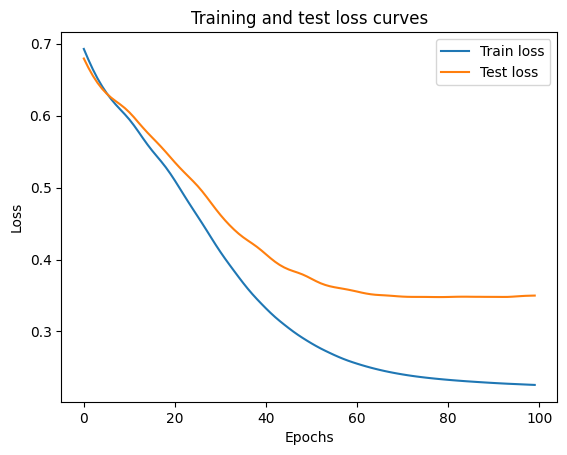

In [126]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()